In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\brdrv\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde


In [3]:
df=pd.read_csv("csv_files/final_data.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'account', 'coin', 'execution price', 'size usd', 'side',
       'trade_date', 'closed pnl', 'classification', 'value'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [6]:
df.columns = df.columns.str.strip().str.lower()

In [7]:
df.to_csv("csv_files/final_data.csv")

In [8]:
print("Unique Accounts:", df['account'].nunique())
print("Unique Coins:", df['coin'].nunique())

# Summary statistics
df[['execution price','size usd','closed pnl','value']].describe()


Unique Accounts: 32
Unique Coins: 239


,execution price,size usd,closed pnl,value
count,184263.000000,1.842630e+05,184263.000000,184263.000000
mean,9624.179560,4.780733e+03,55.492690,51.623484
std,27106.266497,2.690428e+04,937.857954,13.394326
min,0.000005,0.000000e+00,-117990.104100,44.000000
25%,5.024600,1.875300e+02,0.000000,44.000000
50%,17.770000,5.927400e+02,0.000000,44.000000
75%,28.920000,2.032705e+03,6.602400,50.000000
max,109004.000000,3.509753e+06,135329.090100,84.000000


C:\Users\brdrv\AppData\Local\Temp\ipykernel_560\2142609252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_stats.reset_index(), x='classification', y='avg_pnl', palette="coolwarm")


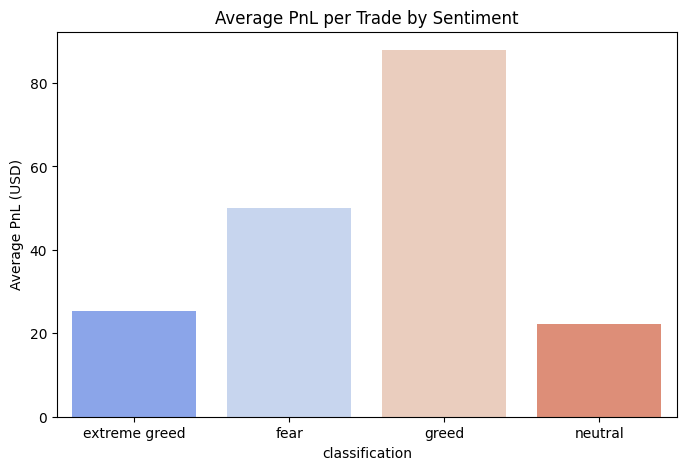

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_stats.reset_index(), x='classification', y='avg_pnl', palette="coolwarm")
plt.title("Average PnL per Trade by Sentiment")
plt.ylabel("Average PnL (USD)")
plt.show()


C:\Users\brdrv\AppData\Local\Temp\ipykernel_560\459323131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_stats.reset_index(), x='classification', y='win_rate', palette="viridis")


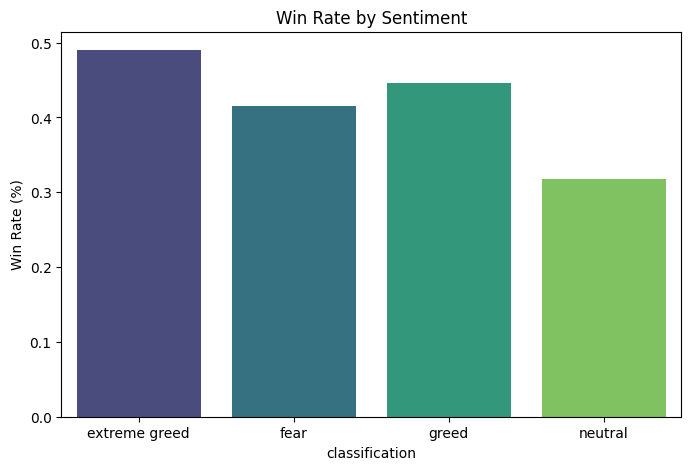

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_stats.reset_index(), x='classification', y='win_rate', palette="viridis")
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate (%)")
plt.show()


C:\Users\brdrv\AppData\Local\Temp\ipykernel_560\1239650184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_stats.reset_index(), x='classification', y='num_trades', palette="muted")


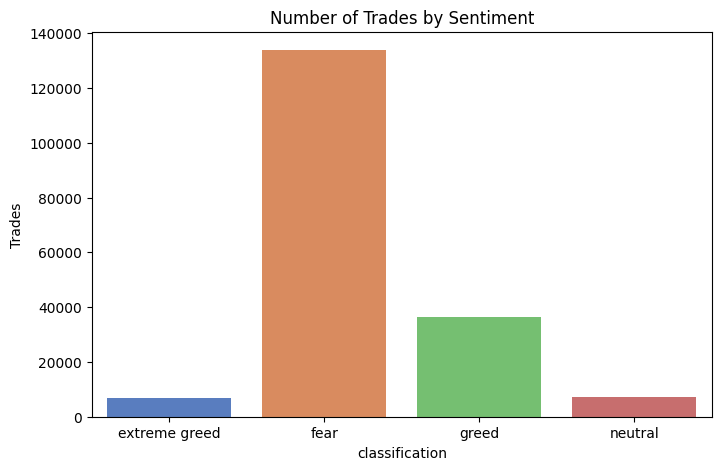

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_stats.reset_index(), x='classification', y='num_trades', palette="muted")
plt.title("Number of Trades by Sentiment")
plt.ylabel("Trades")
plt.savefig("output_files/number_Of_trades.png", dpi=300, bbox_inches='tight')

In [19]:
df.columns

Index(['account', 'coin', 'execution price', 'size usd', 'side', 'trade_date',
       'closed pnl', 'classification', 'value'],
      dtype='object')

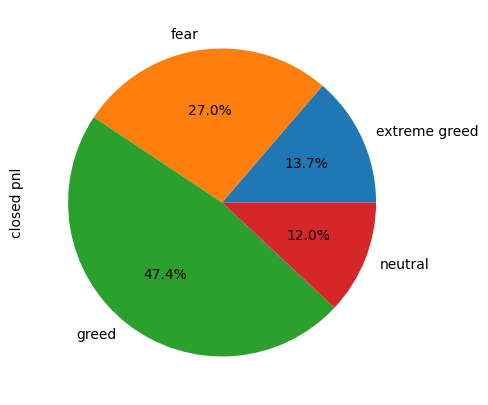

In [ ]:
df.groupby('classification')['closed pnl'].mean().plot(kind='pie', figsize=(7,5), autopct='%1.1f%%')
plt.savefig("output_files/Classification Sentiments")

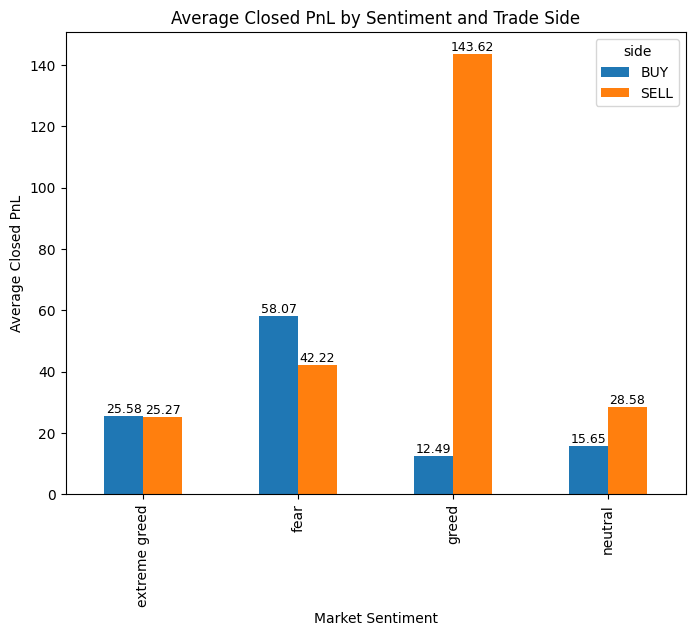

In [53]:
plot_data = df.groupby(['classification','side'])['closed pnl'].mean().unstack()

ax = plot_data.plot(kind='bar', figsize=(8,6))
plt.title("Average Closed PnL by Sentiment and Trade Side")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")

# Add labels directly
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)
    
plt.savefig("output_files/average closed PnL by sentimentand Trade Side")


Time Series analysis

In [32]:
# Aggregate PnL & trades per day
daily_stats = df.groupby('trade_date').agg(
    total_pnl=('closed pnl','sum'),
    avg_pnl=('closed pnl','mean'),
    num_trades=('closed pnl','count'),
    fg_value=('value','mean')
).reset_index()

daily_stats.head()


,trade_date,total_pnl,avg_pnl,num_trades,fg_value
0,2023-03-28,0.000000e+00,0.000000,3,59.0
1,2023-11-14,1.555034e+02,0.148807,1045,69.0
2,2024-03-09,1.769655e+05,25.418772,6962,84.0
3,2024-07-03,1.587424e+05,22.229713,7141,50.0
4,2024-10-27,3.189461e+06,90.504272,35241,74.0


In [33]:
df.columns

Index(['account', 'coin', 'execution price', 'size usd', 'side', 'trade_date',
       'closed pnl', 'classification', 'value'],
      dtype='object')

Correlation PnL vs FG Index: -0.4526619660480214


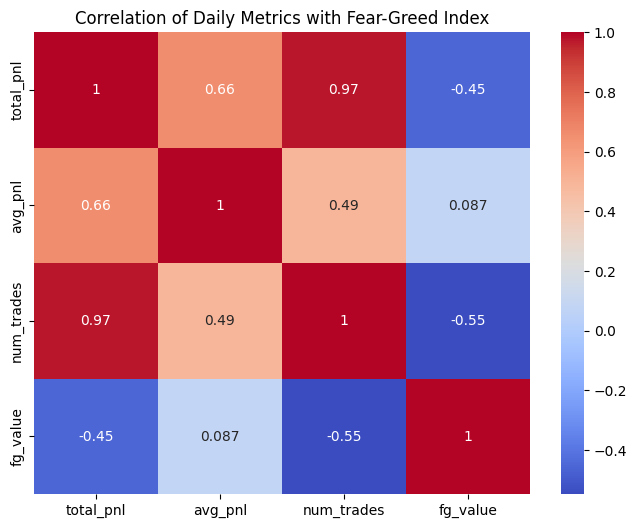

In [29]:
corr = daily_stats[['total_pnl','avg_pnl','num_trades','fg_value']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Daily Metrics with Fear-Greed Index")
plt.savefig("output_files/Correlation PnL vs FG Index.png")

print("Correlation PnL vs FG Index:", corr.loc['total_pnl','fg_value'])


Negative correlation (–0.45) → As the Fear–Greed Index increases (towards Greed/Extreme Greed), the trader’s Closed PnL tends to decrease.